In [1]:
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="Fo9HQJW3695XWsuyPt2k"
)

result = CLIENT.infer("../data/multiple-eggs.jpg", model_id="egg-candling_f2/2")


In [2]:
result

{'inference_id': '23aa562e-47ca-4a3c-bca4-1083055bb352',
 'time': 0.03958133899959648,
 'image': {'width': 513, 'height': 385},
 'predictions': [{'x': 104.0,
   'y': 282.5,
   'width': 144.0,
   'height': 189.0,
   'confidence': 0.9310271143913269,
   'class': 'fer',
   'class_id': 0,
   'detection_id': 'b6b2ef70-2fa2-47fb-bed6-a255031dec49'},
  {'x': 105.5,
   'y': 99.0,
   'width': 139.0,
   'height': 178.0,
   'confidence': 0.9050763845443726,
   'class': 'fer',
   'class_id': 0,
   'detection_id': 'a8d1e2c1-5148-403c-9d3a-5019311a1036'},
  {'x': 252.5,
   'y': 285.0,
   'width': 135.0,
   'height': 190.0,
   'confidence': 0.8516210317611694,
   'class': 'unf',
   'class_id': 1,
   'detection_id': '703cd3e0-893f-4eef-bdcf-bbbbe32a4736'},
  {'x': 399.0,
   'y': 285.0,
   'width': 140.0,
   'height': 180.0,
   'confidence': 0.8309898376464844,
   'class': 'fer',
   'class_id': 0,
   'detection_id': '236399a3-bfc5-42c0-ab3b-ae793b1fd6ae'},
  {'x': 251.0,
   'y': 94.5,
   'width': 138.0

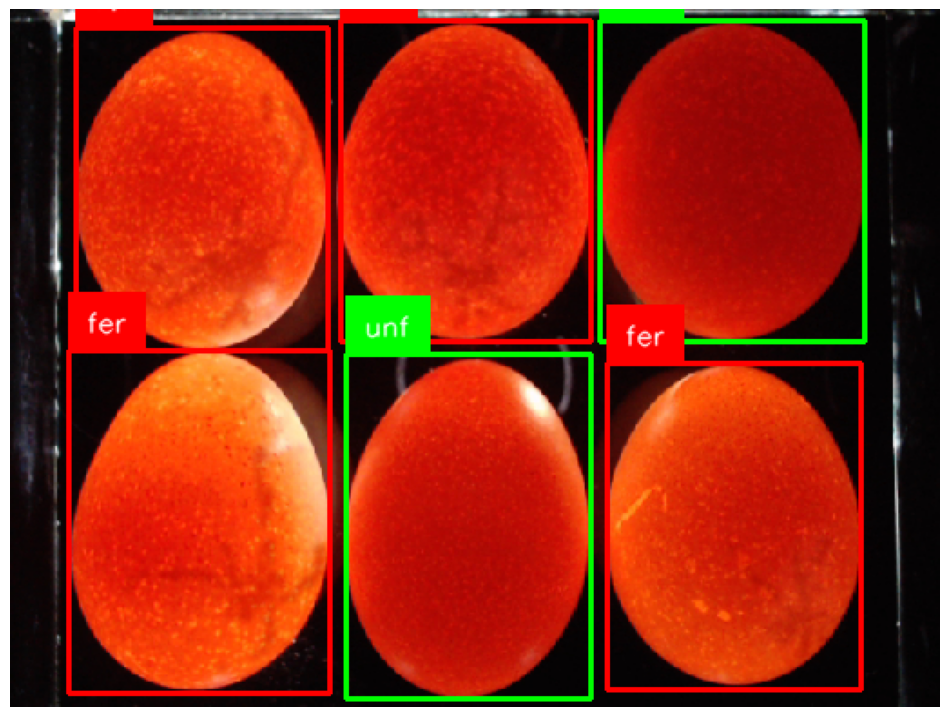

(None,
 {'inference_id': '23aa562e-47ca-4a3c-bca4-1083055bb352',
  'time': 0.03958133899959648,
  'image': {'width': 513, 'height': 385},
  'predictions': [{'x': 104.0,
    'y': 282.5,
    'width': 144.0,
    'height': 189.0,
    'confidence': 0.9310271143913269,
    'class': 'fer',
    'class_id': 0,
    'detection_id': 'b6b2ef70-2fa2-47fb-bed6-a255031dec49'},
   {'x': 105.5,
    'y': 99.0,
    'width': 139.0,
    'height': 178.0,
    'confidence': 0.9050763845443726,
    'class': 'fer',
    'class_id': 0,
    'detection_id': 'a8d1e2c1-5148-403c-9d3a-5019311a1036'},
   {'x': 252.5,
    'y': 285.0,
    'width': 135.0,
    'height': 190.0,
    'confidence': 0.8516210317611694,
    'class': 'unf',
    'class_id': 1,
    'detection_id': '703cd3e0-893f-4eef-bdcf-bbbbe32a4736'},
   {'x': 399.0,
    'y': 285.0,
    'width': 140.0,
    'height': 180.0,
    'confidence': 0.8309898376464844,
    'class': 'fer',
    'class_id': 0,
    'detection_id': '236399a3-bfc5-42c0-ab3b-ae793b1fd6ae'},
   {

In [3]:

import supervision as sv
import cv2
labels = [item["class"] for item in result["predictions"]]

detections = sv.Detections.from_inference(result)

colors = sv.ColorPalette.from_hex(['#FF0000', '#00FF00'])  

label_annotator = sv.LabelAnnotator(color=colors)
bounding_box_annotator = sv.BoxAnnotator(color=colors)

image = cv2.imread("../data/multiple-eggs.jpg")

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

sv.plot_image(image=annotated_image), result